In [688]:
# autoreload
%load_ext autoreload
%autoreload 2

# fix path
import sys
sys.path.append("/home/jxm/reverse-training")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [689]:
from utils.analysis import load_results_as_df
import os


HOME_DIR = "/home/jxm/reverse-training"
df = load_results_as_df(os.path.join(HOME_DIR, "results", "03-26-ablation-projection"))
df["seed_dataset_size"] = df["select_seed_dataset"].str.extract(r"(\d+)").astype(int)


Found 437 files in /home/jxm/reverse-training/results/03-26-ablation-projection/*.pkl
Filtered 0/437 results with no evaluation metrics
dict_keys(['data', 'full_ot_distance', 'sinkhorn_distance', 'jaccard_overlap_examples', 'jaccard_overlap_vocabulary', 'levenshtein_stats', 'args', 'expert_evaluation_metrics', 'evaluation_metrics'])


In [691]:
import pandas as pd

pd.set_option('display.max_rows', None)

dv_cols = ["dataset", "select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"]

iv_cols = ["evaluation_best_eval_accuracy", "dataset_sinkhorn_distance", "dataset_full_ot_distance", "dataset_jaccard_overlap_vocabulary"]

# final_df = df[df["select_seed_dataset"] == "nq_500000"]

df.groupby(dv_cols)[iv_cols].mean().sort_values(
    by=["dataset","select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"], 
    ascending=False
)

evaluation_best_eval_accuracy  \
dataset       select_seed_dataset select_full_dataset_size select_batch_fill_strategy                                  
ag_news_10000 nq_10000            2500                     topk_balanced                                    0.730892   
                                                           topk                                             0.532487   
                                                           random                                           0.745931   
                                                           greedy_batched                                   0.782096   
                                  1000                     topk_balanced                                    0.631087   
                                                           topk                                             0.390169   
                                                           random                                           0.656250   
                                                           greedy_batched                                   0.752148   
                                  500                      topk_balanced                                    0.534798   
                                                           topk                                             0.356022   
                                                           random                                           0.602539   
                                                           greedy_batched                                   0.674219   
                                  100                      topk_balanced                                    0.333818   
                                                           topk                                             0.275723   
                                                           random                                           0.398096   
                                                           greedy_batched                                   0.372979   

                                                                                       dataset_sinkhorn_distance  \
dataset       select_seed_dataset select_full_dataset_size select_batch_fill_strategy                              
ag_news_10000 nq_10000            2500                     topk_balanced                                1.289563   
                                                           topk                                         1.289550   
                                                           random                                       1.291585   
                                                           greedy_batched                               1.278712   
                                  1000                     topk_balanced                                1.288847   
                                                           topk                                         1.292486   
                                                           random                                       1.293661   
                                                           greedy_batched                               1.272102   
                                  500                      topk_balanced                                1.289560   
                                                           topk                                         1.293793   
                                                           random                                       1.295170   
                                                           greedy_batched                               1.274318   
                                  100                      topk_balanced                                1.296026   
                                                           topk                                         1.300939   
                                                           random     

In [692]:


dv_cols = ["dataset", "select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"]

iv_cols = ["evaluation_best_eval_accuracy", "dataset_sinkhorn_distance", "dataset_levenshtein_stats_average_distance", "dataset_full_ot_distance"]


# Final results: dataset size 1000, batch fill strategy is not bottomk
final_df = df[
    (df["select_full_dataset_size"] == 1000) & 
    (df["select_batch_fill_strategy"] != "bottomk") &
    (df["dataset"] != "newsgroup_10000")
].reset_index()
final_df = final_df.groupby(dv_cols)[iv_cols].mean().sort_values(
    by=["dataset","select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"], 
    ascending=False
)
final_df = final_df.reset_index()
final_df = final_df.pivot(index=["select_seed_dataset", "select_batch_fill_strategy"], columns=["dataset"], values=iv_cols)
final_df = final_df.swaplevel(0, 1, axis=1)
final_df = final_df.sort_index(axis=1)
final_df

dataset                                                   ag_news_10000  \
                                               dataset_full_ot_distance   
select_seed_dataset select_batch_fill_strategy                            
nq_10000            greedy_batched                             1.029778   
                    random                                     1.056167   
                    topk                                       1.057323   
                    topk_balanced                              1.050829   

dataset                                                                                    \
                                               dataset_levenshtein_stats_average_distance   
select_seed_dataset select_batch_fill_strategy                                              
nq_10000            greedy_batched                                             168.438793   
                    random                                                     168.505200   
                    topk                                                       168.692260   
                    topk_balanced                                              168.554640   

dataset                                                                   \
                                               dataset_sinkhorn_distance   
select_seed_dataset select_batch_fill_strategy                             
nq_10000            greedy_batched                              1.272102   
                    random                                      1.293661   
                    topk                                        1.292486   
                    topk_balanced                               1.288847   

dataset                                                                       
                                               evaluation_best_eval_accuracy  
select_seed_dataset select_batch_fill_strategy                                
nq_10000            greedy_batched                                  0.752148  
                    random                                          0.656250  
                    topk                                            0.390169  
                    topk_balanced                                   0.631087

In [693]:
final_df[[col for col in final_df.columns if ("sinkhorn" in col[1])]]

dataset                                                    ag_news_10000
                                               dataset_sinkhorn_distance
select_seed_dataset select_batch_fill_strategy                          
nq_10000            greedy_batched                              1.272102
                    random                                      1.293661
                    topk                                        1.292486
                    topk_balanced                               1.288847

<Axes: xlabel='select_projection_dim', ylabel='evaluation_best_eval_accuracy'>

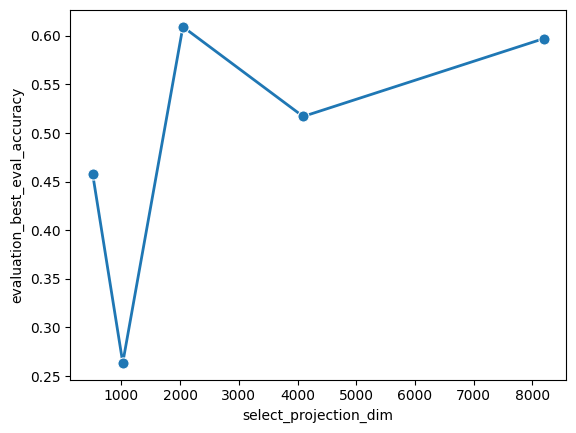

In [694]:
# test line graph
import seaborn as sns
import matplotlib.pyplot as plt

one_df = (
    df[(
        (df["select_seed_dataset"] == "nq_10000") & 
        (df["dataset"] == "ag_news_10000") & 
        (df["select_batch_fill_strategy"] == "topk") & 
        (df["select_full_dataset_size"] == 1000)
    )]
).groupby(["select_projection_dim"])["evaluation_best_eval_accuracy"].max().reset_index()
# [col for col in one_df.columns if "size" in col]
sns.lineplot(data=one_df, x="select_projection_dim", y="evaluation_best_eval_accuracy", lw=2, marker="o", markersize=8)